# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Simple Linear Regression Model

We assume that there is approximately a linear relationship between $X$ and $Y$:

$$
\begin{split}
Y &\approx \beta_0 + \beta_1 * X
\end{split}
$$

### Least Squares Method

The least squares approach choosed $\hat{\beta}_0$ and $\hat{\beta}_1$ to minimize the residual sum of squares (RSS)

$$
\begin{split}
RSS &= r_1^2 + r_2^2 + \dots + r_n^2 \\
\text{or equivalently } RSS &= (y_1 - \hat{\beta}_0 - \hat{\beta}_1 x_1) ^2 + \dots + (y_n - \hat{\beta}_0 - \hat{\beta}_1 x_n)^2
\end{split}
$$

### Estimation of coefficients

$$
\begin{split}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \\
\hat{\beta}_0 &= \bar{y} - \hat{\beta}_1 * \bar{x}
\end{split}
$$

where

$$
\begin{split}
\bar{x} &= \frac{1}{n}\sum_{i=1}^n x_i \\
\text{and } \bar{y} &= \frac{1}{n}\sum_{i=1}^n y_i
\end{split}
$$

### How much do coefficient scatter?

$\hat{\beta}_0$ and $\hat{\beta}_1$ are scattered around the true values $\beta_0$ and $\beta_1$ with the standard error

$$
\begin{split}
se(\hat{\beta}_0)^2 &= \sigma^2 \Bigl( \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n(x_i - \bar{x})^2} \Bigr) \\
\text{and } se(\hat{\beta}_1)^2 &= \frac{\sigma^2}{\sum_{i=1}^n(x_i - \bar{x})^2} \\
\text{where } \sigma^2 &= Var(\epsilon)
\end{split}
$$

### Residuals and Estimation of Variance

In general $\sigma^2$ (variance of the error terms) is not known: but can be estimated on the basis of the data. The error term $\epsilon$

- cannot be observed
- cannot be derived from $\epsilon = Y - (\hat{\beta}_0 + \hat{\beta}_1 X)$ since $\hat{\beta}_0$ and $\hat{\beta}_1$ are unknown.

Approximation for $\epsilon$ : residuals $r_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)$

$$
\hat{\sigma} = RSE = \sqrt{\frac{RSS}{n - 2}} = \sqrt{\frac{r_1^2 + r_2^2 + \dots + r_n^2}{n - 2}}
$$

The factor $\frac{1}{n - 2}$ is chosen so that the stimate of $\sigma$ turns out to be unbiased. This estimate is known as the residual standard error (RSE)

In [98]:
model = stats.norm(0, 2)
func = lambda x: 2.74 + 3.42 * x

x = stats.norm(10, 1).rvs(100)
y = func(x) + model.rvs(x.shape[0])

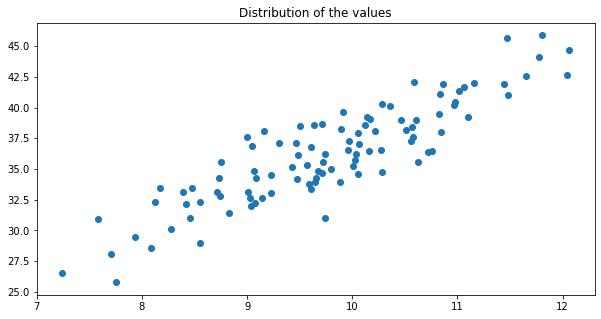

In [106]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.title("Distribution of the values")
plt.show()

In [100]:
x_mean = np.mean(x)
y_mean = np.mean(y)

b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
b0 = y_mean - b1 * x_mean
b1, b0

(3.4136985890489684, 2.862161280507756)

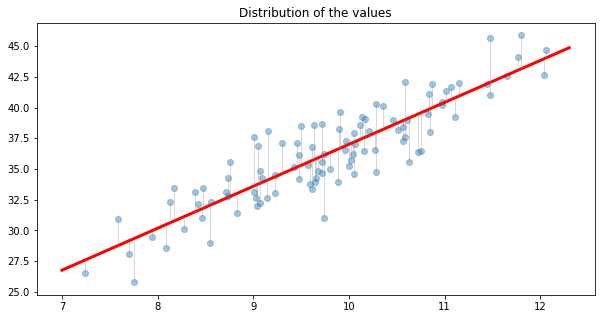

In [101]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.4)
plt.plot(np.array(plt.xlim()), np.array(plt.xlim()) * b1 + b0, c='r', lw=3)

for _x, _y in zip(x, y):
    y_hat = _x * b1 + b0
    plt.plot([_x, _x], [_y, y_hat], alpha=.3, c='grey', lw=1)

plt.title("Distribution of the values")
plt.show()

In [102]:
rss = np.sum((y - (x * b1 + b0)) ** 2)
rss

347.577167145676

In [103]:
rse = np.sqrt(rss / (x.shape[0] - 2))
rse

1.8832699719373152

In [105]:
se_0 = rse ** 2 * ((1 / x.shape[0]) + (x_mean ** 2) / np.sum((x - x_mean) ** 2))
se_1 = (rse ** 2) / np.sum((x - x_mean) ** 2)

se_0, se_1

(3.1349680075129256, 0.03241257143945019)